
    Nama : Dini Ramadhani Salsabila
    Umur = 21 tahun
    E-mail = diniramadhani553@gmail.com
    Asal kampus = Universitas Andalas
    Jurusan = Teknik Komputer



In [1]:
#import paket yg dbutuhkan
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import shutil
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-07-14 14:32:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.03MB/s    in 63s     

2021-07-14 14:33:11 (4.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') #baca file rockpaperscissors.zip 
zip_ref.extractall('/tmp')
zip_ref.close()

#membuat nama pada direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir(base_dir)

['rock', 'scissors', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper']

In [5]:
path = "/tmp/rockpaperscissors/rps-cv-images/"

myList = os.listdir(path)
myList.remove('README_rpc-cv-images.txt')

noOfClasses = len(myList)

print("Label Number:", noOfClasses)
print(myList)

Label Number: 3
['rock', 'scissors', 'paper']


In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
os.listdir('/tmp/rockpaperscissors')

['rock',
 'train',
 'scissors',
 'val',
 'rps-cv-images',
 'README_rpc-cv-images.txt',
 'paper']

In [8]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [9]:
# membagi dataset menjadi training 80% dan testing 20% 
# membuat direktori rock pada direktori data training dan validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2) 

# membuat direktori paper pada direktori data training dan validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# membuat direktori scissors pada direktori data validasi dan training
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [11]:
#membuat directory train
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#membuat direktory val
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [12]:
#memasukkan data ke directory baru

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [15]:
!pip install split_folders

import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(0.8, 0.2))

Copying files: 2188 files [00:00, 3632.20 files/s]


In [17]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train') ## Train Dataset
validation_dir = os.path.join(base_dir, 'val') ## Validation Dataset
os.listdir('/tmp/rockpaperscissors/data/train')

['rock', 'scissors', 'paper']

In [18]:
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'scissors', 'paper']

In [19]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [20]:
#train 80% ini
total_size_train = (
    len(os.listdir('/tmp/rockpaperscissors/data/train/rock')) + 
    len(os.listdir('/tmp/rockpaperscissors/data/train/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/train/scissors'))
)
print('Total Training Data is : {}'.format(total_size_train))

Total Training Data is : 1749


In [21]:
#test 20% nih
total_size_validation = (
    len(os.listdir('/tmp/rockpaperscissors/data/val/rock')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/paper')) +
    len(os.listdir('/tmp/rockpaperscissors/data/val/scissors'))
)
print('Total Test Data is : {}'.format(total_size_validation))



Total Test Data is : 439



*   Data Augmentation

In [29]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [30]:
model = Sequential() #menggunakan model sequential
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation = 'relu', padding = 'same', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(128, kernel_size = (3,3),strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(128, kernel_size = (3,3),strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

#Flatten feature map
model.add(Flatten())
model.add(Dropout(0.5))

#Fully connected layer
model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [31]:
class testCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.88 and logs.get('val_accuracy') > 0.88):
      print("\nAchive 88% Accuracy")
      self.model.stop_training = True
callbacks = testCallback()

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
!rm -rf /tmp/rockpaperscissors/rps-cv-images/.ipynb_checkpoints

In [34]:
#latih dengan image data generator
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 151s - loss: 1.0806 - accuracy: 0.3944 - val_loss: 0.8602 - val_accuracy: 0.8254
Epoch 2/20
25/25 - 131s - loss: 0.7348 - accuracy: 0.6737 - val_loss: 0.2718 - val_accuracy: 0.9083
Epoch 3/20
25/25 - 132s - loss: 0.4355 - accuracy: 0.8385 - val_loss: 0.1611 - val_accuracy: 0.9577
Epoch 4/20
25/25 - 135s - loss: 0.3213 - accuracy: 0.8770 - val_loss: 0.0535 - val_accuracy: 0.9877
Epoch 5/20
25/25 - 136s - loss: 0.2137 - accuracy: 0.9303 - val_loss: 0.0498 - val_accuracy: 0.9894

Achive 88% Accuracy


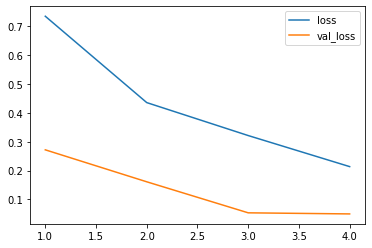

In [35]:
#loss 
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
plt.show()

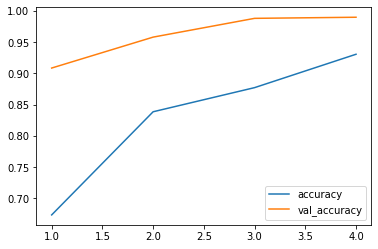

In [36]:
#accuracy 
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [37]:
#Best validation loss and accuracy score
print(("Best Validation Loss: {:0.2f}" +"\nBest Validation Accuracy: {:0.2f}").format(history_df['val_loss'].min(), history_df['val_accuracy'].max()))

Best Validation Loss: 0.05
Best Validation Accuracy: 0.99


Convert Model to tflite

In [38]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpm2guwl0f/assets


In [39]:
#Download converted model
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

klasifikasi dengan input gambar

Saving 3ONDEuB8iwAYO1Uz.png to 3ONDEuB8iwAYO1Uz.png
3ONDEuB8iwAYO1Uz.png
rock


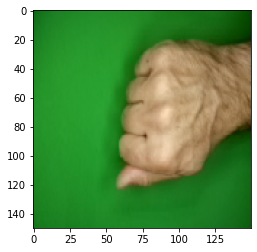

In [ ]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')

# Bagian Baru